In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

import MuC.detgeo as dg
from MuC import collider_tools as col
from MuC import detector_tools as det
from MuC import plot_tools as pt

from MuC.detgeo import SimulateDetector

In [5]:
import MuC
from MuC.detector_geometries import det_v2

In [6]:
design = dg.SimulateDetector(design=col.muc_10tev, N_evals = 1e4, save_mem=False)
sim = design.run()
with open(f'gen_data/MH_test_{design.design["short_name"]}.pkl', 'wb') as f:
    pickle.dump(sim, f)

MuC 10 TeV parameter set with 1.000e+04 evaluations .
1.791e+04 MC generations; took 0.544 s.
Total count: 2.18e+11 events; took 5.53 s (numba pre-compilation needed).



In [7]:
NEVENTS = 1e5

# col_designs = [col.muc_3tev, col.muc_10tev, col.mut_2tev, col.mut_2tev_pol]
col_designs = [col.muc_1p5tev, col.muc_3tev, col.muc_10tev, col.muc_30tev, col.mut_2tev, col.mut_2tev_pol]
col_sims = []
for design in col_designs:
    sim = dg.SimulateDetector(design=design, N_evals = NEVENTS, save_mem=False)
    col_sims.append(sim.run())

MuC 1.5 TeV parameter set with 1.000e+05 evaluations .
1.875e+05 MC generations; took 3.05 s.
Total count: 2.85e+11 events; took 1.53 s.

MuC 3 TeV parameter set with 1.000e+05 evaluations .
1.874e+05 MC generations; took 3.0 s.
Total count: 2.22e+11 events; took 1.02 s.

MuC 10 TeV parameter set with 1.000e+05 evaluations .
1.875e+05 MC generations; took 3.06 s.
Total count: 2.49e+11 events; took 0.831 s.

MuC 30 TeV parameter set with 1.000e+05 evaluations .
1.875e+05 MC generations; took 2.94 s.
Total count: 7.00e+11 events; took 0.723 s.

$\mu$TRISTAN 2 TeV parameter set with 1.000e+05 evaluations .
1.875e+05 MC generations; took 2.9 s.
Total count: 1.26e+11 events; took 0.892 s.

$\mu$TRISTAN 2 TeV (P=0.8) parameter set with 1.000e+05 evaluations .
1.875e+05 MC generations; took 2.93 s.
Total count: 1.28e+11 events; took 0.981 s.



## Saving simulations to file

In [8]:
version = 'MH_test'
for design, sim in zip(col_designs, col_sims):
    with open(f'gen_data/{version}_{design["short_name"]}.pkl', 'wb') as f:
        pickle.dump(sim, f)

Text(0.5, 1.0, 'Neutrino fractional energy')

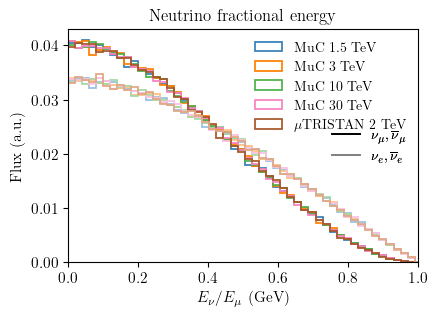

In [9]:
bins = np.linspace(0,2, 100)

light_factor = 0.5
LW=1.25

fig, ax = pt.std_fig()
def plot_curve(i):
    ax.hist(col_sims[i].cco.pnumu[:,0]/col_sims[i].design['beam_p0'], weights = col_sims[i].cco.weights, bins = bins, histtype = 'step', label = col_sims[i].design['name'], color = pt.cblind_safe_wheel[i], zorder = 2, lw=LW)
    ax.hist(col_sims[i].cco.pnue[:,0]/col_sims[i].design['beam_p0'], weights = col_sims[i].cco.weights, bins = bins, histtype = 'step', color = pt.lighten_color(pt.cblind_safe_wheel[i],light_factor), zorder = 2, lw=LW)

plot_curve(0)
plot_curve(1)
plot_curve(2)
plot_curve(3)
plot_curve(4)

# standard legend
leg1 = ax.legend(loc = 'upper right')

# Create a new legend
dark_line = plt.Line2D([], [], color='black', lw=LW, label=r'$\nu_\mu,\overline\nu_\mu$')
light_line = plt.Line2D([], [], color='gray', lw=LW, label=r'$\nu_e,\overline\nu_e$')
leg2 = ax.legend(handles=[dark_line, light_line], loc='center right')

plt.gca().add_artist(leg1)
plt.gca().add_artist(leg2)

ax.set_xlabel(r'$E_{\nu}/E_\mu$ (GeV)')
ax.set_ylabel(r'Flux (a.u.)')
# plt.xscale('log')
# ax.set_xlim(10,0.6*10**4)
ax.set_xlim(0,1)
ax.set_title(r'Neutrino fractional energy', fontsize = 12)
# plt.savefig('plots_Luc/posterplots/pl_e.jpg', bbox_inches = 'tight', dpi = 500)

In [10]:
def get_angle(p):
    # return np.arccos(p[:,-1]/np.linalg.norm(p[:,1:], axis = 1))
    return np.arccos(p[:,-1]/p[:,0])


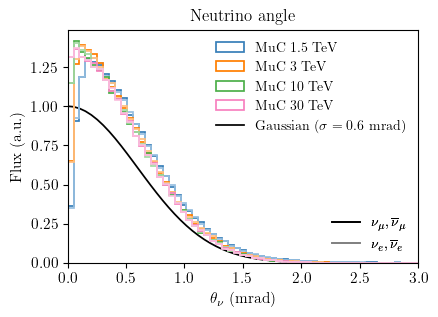

In [11]:
# bins = np.geomspace(1e-2,3, 100)
bins = np.linspace(0,3, 60)
light_factor = 0.5
LW=1.25
units = 1e3#180/np.pi
fig, ax = pt.std_fig()

kwargs = {'zorder': 2, 'lw': LW, 'histtype': 'step', 'bins': bins, 'cumulative': False, 'density': True}
def plot_curve(i):
    ax.hist(units*get_angle(col_sims[i].cco.pnumu), weights = col_sims[i].cco.weights, label = col_sims[i].design['name'], color = pt.cblind_safe_wheel[i], **kwargs)
    ax.hist(units*get_angle(col_sims[i].cco.pnue), weights = col_sims[i].cco.weights, color = pt.lighten_color(pt.cblind_safe_wheel[i],light_factor), **kwargs)

plot_curve(0)
plot_curve(1)
plot_curve(2)
plot_curve(3)
# plot_curve(4)

ax.plot(bins, np.exp(-bins**2/(2*(6e-4*units)**2)), label = 'Gaussian ($\sigma = 0.6$~mrad)', color = 'black', lw = LW, zorder = 1)
# standard legend
leg1 = ax.legend(loc = 'upper right')

# Create a new legend
dark_line = plt.Line2D([], [], color='black', lw=LW, label=r'$\nu_\mu,\overline\nu_\mu$')
light_line = plt.Line2D([], [], color='gray', lw=LW, label=r'$\nu_e,\overline\nu_e$')
leg2 = ax.legend(handles=[dark_line, light_line], loc='lower right')

plt.gca().add_artist(leg1)
plt.gca().add_artist(leg2)

ax.set_xlabel(r'$\theta_\nu$ (mrad)')
ax.set_ylabel(r'Flux (a.u.)')
# ax.set_xscale('log')
ax.set_xlim(bins.min(), bins.max())
ax.set_title(r'Neutrino angle', fontsize = 12)
plt.savefig('plots/paper_plots/neutrino_angle.jpg', bbox_inches = 'tight', dpi = 500)

## Straight segment study

In [12]:
def get_sim_with_new_Lss(l, baseline_design=col.muc_3tev, nevents=1e4):
    baseline_design['Lss'] = l
    sim = dg.SimulateDetector(design=baseline_design, N_evals=nevents, save_mem=False)
    return sim.run()
get_sim_with_new_Lss_vec = np.vectorize(get_sim_with_new_Lss)


Lss_s = np.linspace(15, 220, 50)

L_sims_1p5tev = get_sim_with_new_Lss_vec(Lss_s,baseline_design=col.muc_1p5tev,  nevents = 1e5)
L_sims_3tev = get_sim_with_new_Lss_vec(Lss_s,baseline_design=col.muc_3tev,  nevents = 1e5)
L_sims_10tev = get_sim_with_new_Lss_vec(Lss_s,baseline_design=col.muc_10tev,  nevents = 1e5)

MuC 1.5 TeV parameter set with 1.000e+05 evaluations .
1.874e+05 MC generations; took 3.06 s.
Total count: 4.54e+11 events; took 1.2 s.

MuC 1.5 TeV parameter set with 1.000e+05 evaluations .
1.875e+05 MC generations; took 3.06 s.
Total count: 4.56e+11 events; took 1.32 s.

MuC 1.5 TeV parameter set with 1.000e+05 evaluations .
1.875e+05 MC generations; took 3.05 s.
Total count: 4.11e+11 events; took 1.17 s.

MuC 1.5 TeV parameter set with 1.000e+05 evaluations .
1.875e+05 MC generations; took 2.94 s.
Total count: 3.69e+11 events; took 1.06 s.

MuC 1.5 TeV parameter set with 1.000e+05 evaluations .
1.875e+05 MC generations; took 2.93 s.
Total count: 3.42e+11 events; took 1.1 s.

MuC 1.5 TeV parameter set with 1.000e+05 evaluations .
1.875e+05 MC generations; took 2.96 s.
Total count: 3.20e+11 events; took 1.1 s.

MuC 1.5 TeV parameter set with 1.000e+05 evaluations .
1.875e+05 MC generations; took 2.87 s.
Total count: 3.12e+11 events; took 1.07 s.

MuC 1.5 TeV parameter set with 1.000e

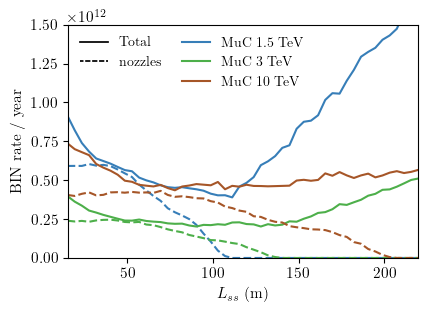

In [63]:
fig, ax = pt.std_fig()

ax.plot(Lss_s, [sim.get_face_counts(print_table=False).sum(axis=1)[-1] for sim in L_sims_1p5tev], label=L_sims_1p5tev[0].design['name'], color=pt.cblind_safe_wheel[0])
ax.plot(Lss_s, [sim.get_face_counts(print_table=False).sum(axis=1)[-1] - sim.get_face_counts(print_table=False).sum(axis=1)[-2] for sim in L_sims_1p5tev], color=pt.cblind_safe_wheel[0], ls='--')

ax.plot(Lss_s, [sim.get_face_counts(print_table=False).sum(axis=1)[-1] for sim in L_sims_3tev], label=L_sims_3tev[0].design['name'], color=pt.cblind_safe_wheel[2])
ax.plot(Lss_s, [sim.get_face_counts(print_table=False).sum(axis=1)[-1] - sim.get_face_counts(print_table=False).sum(axis=1)[-2] for sim in L_sims_3tev], color=pt.cblind_safe_wheel[2], ls='--')

ax.plot(Lss_s, [sim.get_face_counts(print_table=False).sum(axis=1)[-1] for sim in L_sims_10tev], label=L_sims_10tev[0].design['name'], color=pt.cblind_safe_wheel[4])
ax.plot(Lss_s, [sim.get_face_counts(print_table=False).sum(axis=1)[-1] - sim.get_face_counts(print_table=False).sum(axis=1)[-2] for sim in L_sims_10tev], color=pt.cblind_safe_wheel[4], ls='--')

# standard legend
leg1 = ax.legend(loc = 'upper center')

# Create a new legend
dark_line = plt.Line2D([], [], color='black', lw=LW, label=r'Total')
light_line = plt.Line2D([], [], color='black', lw=LW, ls=(1,(3,1)), label=r'nozzles')
leg2 = ax.legend(handles=[dark_line, light_line], loc='upper left')

plt.gca().add_artist(leg1)
# plt.gca().add_artist(leg2)

ax.set_ylim(0,1.5e12)
# ax.set_yscale('log')
# ax.set_ylim(1e10,10e12)
ax.set_xlim(15,220)

ax.set_xlabel(r'$L_{ss}$ (m)')
ax.set_ylabel(r'BIN rate / year')
fig.savefig('plots/paper_plots/Lss_sensitivity.pdf', bbox_inches = 'tight', dpi = 400)

In [14]:
## muTRISTAN polarization study

In [15]:
def get_sim_with_new_Pol(P, baseline_design=col.mut_2tev, nevents=1e4):
    baseline_design['muon_polarization'] = P
    baseline_design['beam_p0'] = 1e3
    sim = dg.SimulateDetector(design=baseline_design, N_evals=nevents, save_mem=False)
    return sim.run()

get_sim_with_new_Pol_vec = np.vectorize(get_sim_with_new_Pol)

Pols = np.linspace(0.2, 0.8, 10)

Pol_sims = get_sim_with_new_Pol_vec(Pols,  nevents = 1e6)

$\mu$TRISTAN 2 TeV parameter set with 1.000e+06 evaluations .
1.853e+06 MC generations; took 24.1 s.
Total count: 1.27e+11 events; took 22.2 s.

$\mu$TRISTAN 2 TeV parameter set with 1.000e+06 evaluations .
1.853e+06 MC generations; took 24.0 s.
Total count: 1.26e+11 events; took 22.1 s.

$\mu$TRISTAN 2 TeV parameter set with 1.000e+06 evaluations .
1.853e+06 MC generations; took 24.0 s.
Total count: 1.27e+11 events; took 22.3 s.

$\mu$TRISTAN 2 TeV parameter set with 1.000e+06 evaluations .
1.853e+06 MC generations; took 23.6 s.
Total count: 1.26e+11 events; took 22.2 s.

$\mu$TRISTAN 2 TeV parameter set with 1.000e+06 evaluations .
1.853e+06 MC generations; took 24.0 s.
Total count: 1.28e+11 events; took 22.6 s.

$\mu$TRISTAN 2 TeV parameter set with 1.000e+06 evaluations .
1.853e+06 MC generations; took 23.9 s.
Total count: 1.28e+11 events; took 22.1 s.

$\mu$TRISTAN 2 TeV parameter set with 1.000e+06 evaluations .
1.853e+06 MC generations; took 23.9 s.
Total count: 1.28e+11 events;

0.2
0.2666666666666667
0.33333333333333337
0.4
0.46666666666666673
0.5333333333333334
0.6000000000000001
0.6666666666666667
0.7333333333333334
0.8


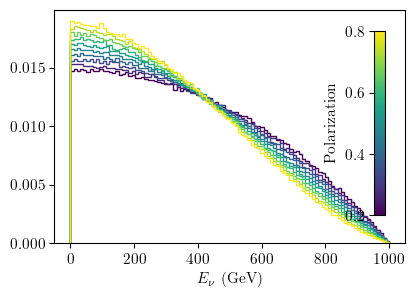

In [19]:
import matplotlib as mpl
from DarkNews import Cfourvec as Cfv

norm = mpl.colors.Normalize(vmin=Pols.min(), vmax=Pols.max())
cmap = mpl.cm.viridis
colors = cmap(np.linspace(0, 1, len(Pols)))

fig, ax = pt.std_fig()

for i in range(len(Pols)):
# for i in [0,4,9]:
    # b = np.linspace(0, 1e-3, 100)
    # plt.hist(np.arccos(Cfv.get_cosTheta(Pol_sims[i].cco.pnumu)), color=colors[i], weights=Pol_sims[i].cco.weights, bins=b, histtype='step', zorder=1-i/100)
    
    b = np.linspace(0, 1e3, 100)
    plt.hist(Pol_sims[i].cco.pnue[:,0], weights=Pol_sims[i].cco.weights, bins=b, histtype='step', color=colors[i], label=f'P = {Pols[i]:.2f}')
    print(Pol_sims[i].design['muon_polarization'])

# plt.legend()
# fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
#              cax=ax, orientation='horizontal', label='Some Units')
plt.xlabel(r'$E_{\nu}$ (GeV)')
cax = plt.axes([0.9, 0.25, 0.025, 0.6])
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), orientation="vertical", cax=cax, label=r'Polarization', ticklocation='left')
plt.savefig('plots/paper_plots/pol_study.jpg', bbox_inches = 'tight', dpi = 500)

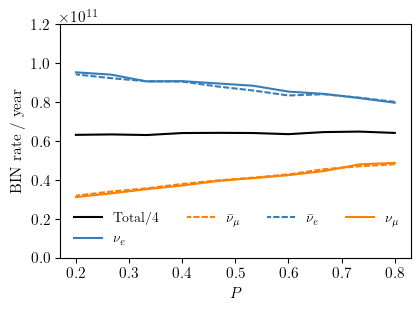

In [73]:
fig, ax = pt.std_fig()

ax.plot(Pols, [sim.get_face_counts(print_table=False).sum(axis=0)[:-1].sum()/4 for sim in Pol_sims], label=r'Total/4', color='black')
ax.plot(Pols, [sim.get_face_counts(print_table=False).sum(axis=0)[0] for sim in Pol_sims], label=r'$\nu_e$', color=pt.cblind_safe_wheel[0])
ax.plot(Pols, [sim.get_face_counts(print_table=False).sum(axis=0)[1] for sim in Pol_sims], label=r'$\bar\nu_\mu$', color=pt.cblind_safe_wheel[1], ls=(1,(3,1)))
ax.plot(Pols, [sim.get_face_counts(print_table=False).sum(axis=0)[2] for sim in Pol_sims], label=r'$\bar\nu_e$', color=pt.cblind_safe_wheel[0], ls=(1,(3,1)))
ax.plot(Pols, [sim.get_face_counts(print_table=False).sum(axis=0)[3] for sim in Pol_sims], label=r'$\nu_\mu$', color=pt.cblind_safe_wheel[1], ls='-')

# standard legend
leg1 = ax.legend(loc = 'lower right', ncols=4)

# Create a new legend
# dark_line = plt.Line2D([], [], color='black', lw=LW, label=r'Total')
# light_line = plt.Line2D([], [], color='black', lw=LW, ls=(1,(3,1)), label=r'nozzles')
# leg2 = ax.legend(handles=[dark_line, light_line], loc='upper left')

# plt.gca().add_artist(leg1)
# plt.gca().add_artist(leg2)

ax.set_ylim(0,1.2e11)

# ax.set_yscale('log')
ax.set_xlabel(r'$P$')
ax.set_ylabel(r'BIN rate / year')
fig.savefig('plots/paper_plots/Pol_sensitivity.pdf', bbox_inches = 'tight', dpi = 400)

plt.savefig('plots/paper_plots/pol_study_2.jpg', bbox_inches = 'tight', dpi = 500)